### Aspirante: Fernando Andrés Roa Martín
### Prueba Data Scientist - Mercado Libre
### Objetivo: Análisis exploratorio de Datos
### Dataset: bank_transactions
### Fecha: 2024/09/03

El dataset bank_transactions cuenta con 11 variables. A continuación, una se presenta la descripción de las columnas del dataset:

| Variable            | Descripción                                                                 |
| :------------------ | :-------------------------------------------------------------------------- |
| account_id          | Número de cuenta involucrado en la transacción.                              |
| date                | Fecha de la transacción.                                                     |
| transaction_details | Narración o descripción de la transacción en los estados de cuenta bancarios.|
| chq_no              | Número de cheque asociado con la transacción, si corresponde.                |
| value_date          | Fecha de finalización de la transacción.                                     |
| withdrawal_amt.     | Monto retirado en la transacción.                                            |
| deposit_amt         | Monto depositado en la transacción.                                          |
| balance_amt         | Saldo actual de la cuenta después de la transacción.                         |
| category            | Categoría asignada basada en los detalles de la transacción.       |
| city                | Ciudad donde se asume que ocurrió la transacción.                  |
| device              | Tipo de dispositivo utilizado para la transacción (e.g., Móvil, Escritorio, Tablet). |

### 1. Análisis exploratorio de datos

In [1]:
# Importar librerías para la manipulación y análisis de datos
import pandas as pd  
import numpy as np  

# Importar librerías para visualización de datos
from functions_visual import *

# Configuración de pandas para mostrar todas las columnas del DataFrame sin truncar
pd.options.display.max_columns = None  

# Configuración de pandas para mostrar todas las filas del DataFrame sin truncar
pd.options.display.max_rows = None  

# Configuración de pandas para mostrar los números decimales con dos dígitos
pd.options.display.float_format = '{:.2f}'.format 

In [2]:
# Carga del dataset bank_transactions

df = pd.read_parquet('./inputs/bank_transactions.parquet')

In [3]:
# Inspeccion de registros aleatorios de la data

df.sample(3)

,account_id,date,transaction_details,chq_no,value_date,withdrawal_amt,deposit_amt,balance_amt,category,city,device
107740,'409000362497',2017-09-22,726519343351,NaN,2017-09-22,NaN,200000.00,-1901987568.24,Miscellaneous,San Antonio,Desktop
37962,'1196428',2015-02-21,CHQ DEP/691581/OWDEL1/SBI,NaN,2015-02-21,NaN,15000.00,-1588969947.61,Miscellaneous,Chicago,Desktop
39075,'1196428',2015-06-11,CASHDEP/RAJOURI/,NaN,2015-06-11,NaN,323000.00,-1584425591.61,Miscellaneous,Los Angeles,Mobile


In [4]:
# Tamaño de la data

print(f'La cantidad de filas es: {df.shape[0]} y la cantidad de columnas es: {df.shape[1]}')

La cantidad de filas es: 116201 y la cantidad de columnas es: 11


In [5]:
# Eliminacion de registros duplicados en caso de que existan

len_antes_dup = df.shape[0]
df.drop_duplicates(inplace=True)
len_despues_dup = df.shape[0]

print(f'La cantidad de filas en el dataset después de eliminar duplicados es: {df.shape[0]} \
y la cantidad de columnas es: {df.shape[1]}\n\
Registros duplicados eliminados: {len_antes_dup - len_despues_dup}')

La cantidad de filas en el dataset después de eliminar duplicados es: 116198 y la cantidad de columnas es: 11
Registros duplicados eliminados: 3


In [6]:
# Tipo de datos de cada feature de la data

df.dtypes

account_id                     object
date                   datetime64[ns]
transaction_details            object
chq_no                        float64
value_date             datetime64[ns]
withdrawal_amt                float64
deposit_amt                   float64
balance_amt                   float64
category                       object
city                           object
device                         object
dtype: object

Las columnas date y value_date ya se presentan en formato de fecha, por lo que no requieren cambios de formato.

In [7]:
# Porcentaje de valores nulos por feature

df.isnull().sum()*100 / len(df)

account_id             0.00
date                   0.00
transaction_details    2.15
chq_no                99.22
value_date             0.00
withdrawal_amt        53.92
deposit_amt           46.08
balance_amt            0.00
category               0.00
city                   0.00
device                 0.00
dtype: float64

Tras el cálculo de porcentaje de valores nulos por feature se evidencia:

* Un faltante del 2.15% de los valores de la variable transaction details, un valor 
    que se considera bajo y manejable.
* Un faltante del 99.22% de los valores de la variable chq_no, lo que implica que es 
    poco común el uso de los mismos para realizar depósitos.
* Un faltante del 53.92% de los valores de la variable withdrawal_amt y un 46.08% de 
    la variable deposit_amt, los cuales están directamente relacionados, e indican 
    que cada transacción puede ser un depósito o un retiro de dinero, pero no ambos 
    movimientos al tiempo, siendo excluyentes.

In [8]:
# Creación de variables year y month a partir de la variable date
df['year'] = df['date'].dt.year
df['year'] = df['year'].astype('category')
df['month'] = df['date'].dt.month
df['month'] = df['month'].astype('category')

In [9]:
# Descriptivo de las features numéricas

df.describe(exclude=['object', 'category'])

,date,chq_no,value_date,withdrawal_amt,deposit_amt,balance_amt
count,116198,905.00,116198,53547.00,62651.00,116198.00
mean,2017-05-20 00:11:16.638152448,791614.50,2017-05-20 00:07:19.443019776,4489058.81,3806407.17,-1404845830.48
min,2015-01-01 00:00:00,1.00,2015-01-01 00:00:00,0.01,0.01,-2045201141.91
25%,2016-05-30 00:00:00,704231.00,2016-05-30 00:00:00,3000.00,99000.00,-1690383400.28
50%,2017-06-05 00:00:00,873812.00,2017-06-05 00:00:00,47073.00,426500.00,-1661395364.16
75%,2018-05-26 00:00:00,874167.00,2018-05-26 00:00:00,5000000.00,4745300.50,-1236829992.69
max,2019-03-05 00:00:00,874525.00,2019-03-05 00:00:00,459447546.36,544800000.00,8500000.00
std,NaN,151205.93,NaN,10848601.23,8683047.54,534825596.58


De acuerdo al descriptivo de las features numéricas se evidencia que:
* Se tiene un registro de transacciones entre el 2015-01-01 hasta el 2019-03-05.
* La variable withdrawal_amt (retiros) presenta un sesgo positivo, ya que el valor 
    de la media es mucho mayor al valor de la mediana. 
* Posible presencia de outliers en la variable withdrawal_amt (retiros), donde se 
    observa una desviación estándar alta en comparación a la media y la mediana.
* La variable deposit_amt (depósitos) presenta un sesgo positivo, ya que el valor 
    de la media es mucho mayor al valor de la mediana. 
* Posible presencia de outliers en la variable deposit_amt (depósitos), donde se 
    observa una desviación estándar alta en comparación a la media y la mediana.
* El balance de las cuentas en el periodo de la data es predominantemente negativo
    y los valores presentan alta dispersión (alta desviación estándar).
* Los balances predominantemente negativos pueden implicar riesgo de crédito o
    que las cuentas consideradas en el dataset presentan comportamientos de deuda.

NOTA: Debe considerarse el cálculo del transformaciones como logaritmos a las 
variables withdrawal_amt y deposit_amt para reducir la asimetría o la aplicación
de técnicas de detección de outliers. 

In [10]:
# Descriptivo de las features categóricas

df.describe(include=['object', 'category'])

,account_id,transaction_details,category,city,device,year,month
count,116198,113699,116198,116198,116198,116198,116198
unique,10,44806,18,10,3,5,12
top,'1196428',FDRL/INTERNAL FUND TRANSFE,Miscellaneous,Phoenix,Tablet,2018,7
freq,48776,8839,86899,11869,39101,35533,11150


De acuerdo al descriptivo de las features tipo categóricas se destaca que:
* El dataframe cuenta con el historial de 10 cuentas diferentes, donde la cuenta
    con id '1196428' abarca cerc del 42% de los registros.
* El texto presentado en el detalle de la transacción es altamente variable.
* Se presentan 18 categorías diferentes, de las cuales Miscellaneous abaca
    un 75% de los registros. Es común que esta categoría se utilice para
    agrupar transacciones que no tienen suficiente información para ser
    categorizadas de otra manera.

#### Análisis Univariado

In [11]:
# Definir variables que no se van a graficar como excepciones
exception_columns = [col for col in df.columns if pd.api.types.is_datetime64_any_dtype(df[col])] + ['chq_no', 'transaction_details']

# Definir variables numéricas
numeric_columns = list(set(df.describe(exclude=['object', 'category']).columns) - set(exception_columns))

# Definir variables categóricas
categorical_columns = list(set(df.describe(include=['object', 'category']).columns) - set(exception_columns))

Análisis Univariado de Variables Numéricas - Histogramas y KDE


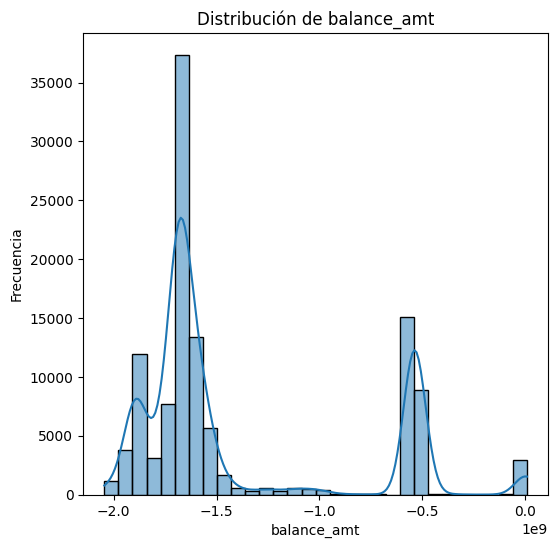

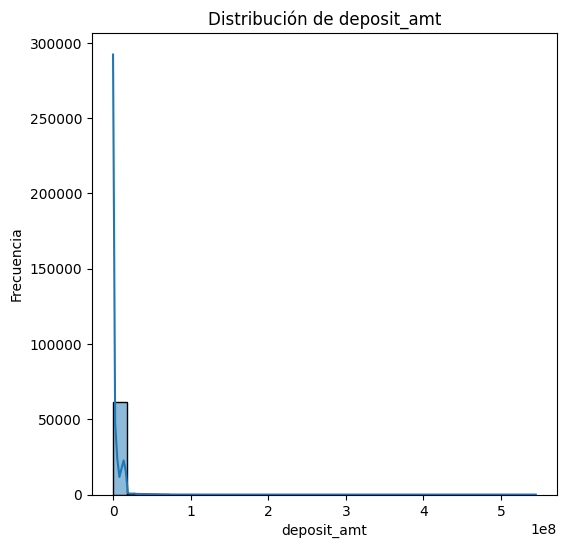

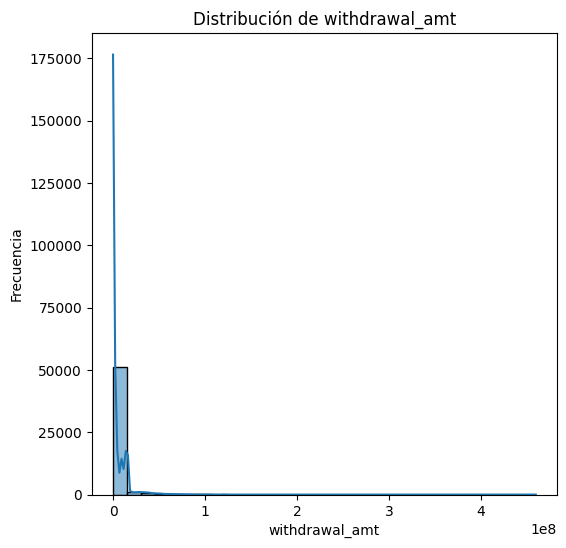

In [12]:
# Análisis Univariado - Numérico
print("Análisis Univariado de Variables Numéricas - Histogramas y KDE")
univariate_numeric_hist(df, numeric_columns)

Análisis Univariado de Variables Numéricas - Boxplots


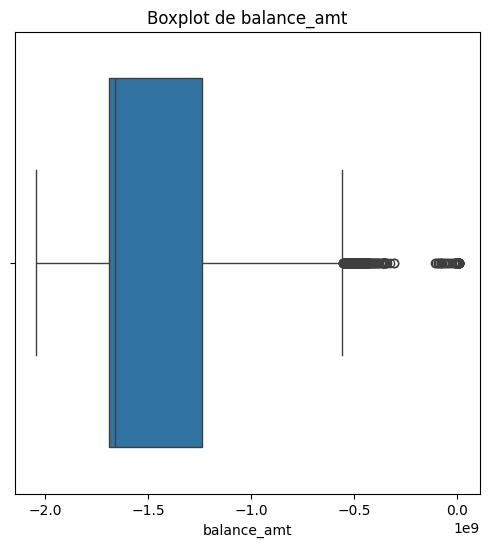

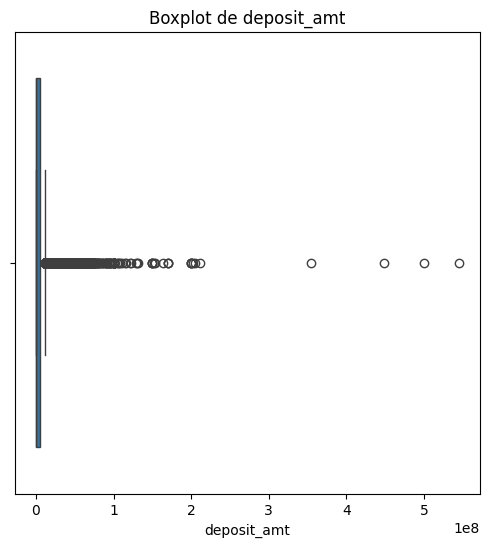

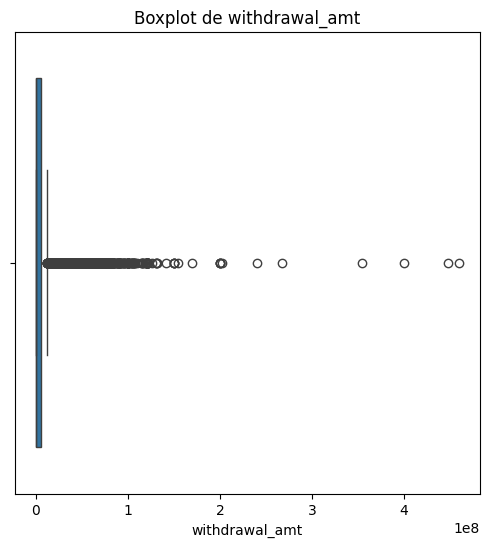

In [13]:
print("Análisis Univariado de Variables Numéricas - Boxplots")
univariate_numeric_boxplot(df, numeric_columns)

Tras el análisis univariado de las variables numéricas:
* Se confirma la existencia de valores extremos para las variables withdrawal_amt y deposit_amt, por lo que para tareas de machine learning se recomienda el uso transformaciones logarítmicas sobre las variables. Las variables mencionadas tienen una distribución con sesgo positivo. 
* Para la variable balance_amt, no se recomienda ningún tipo de transformación o eliminación de valoes extremos.

Análisis Univariado de Variables Categóricas


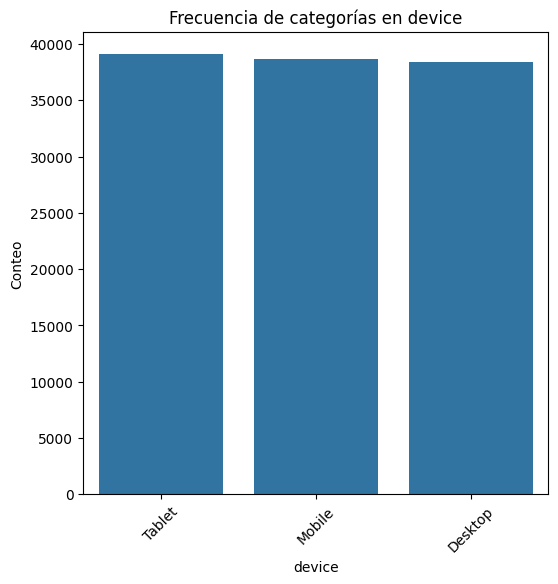

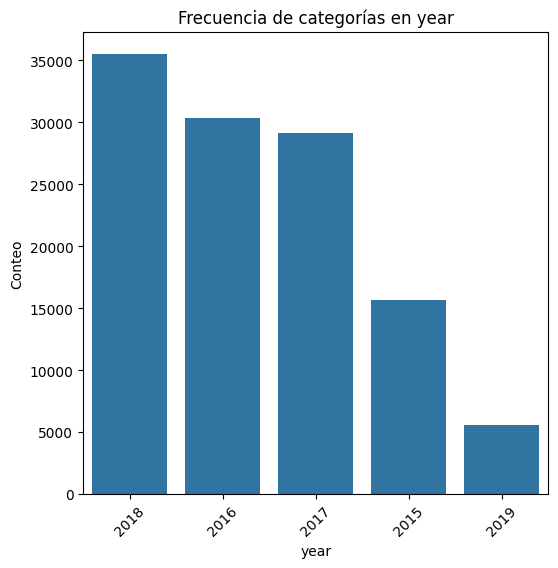

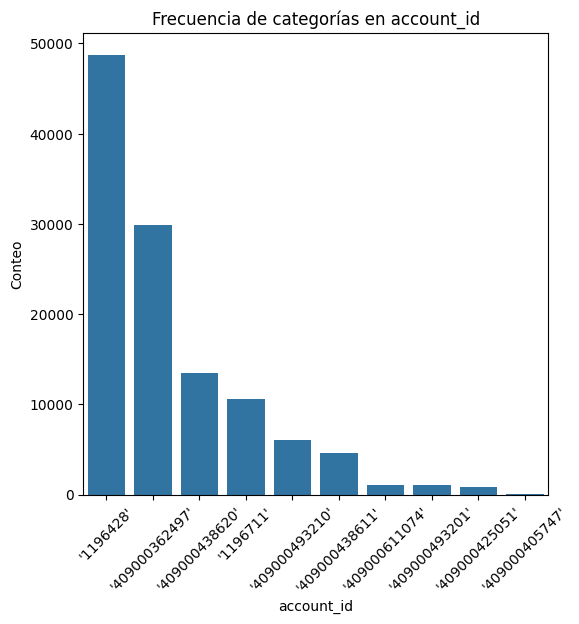

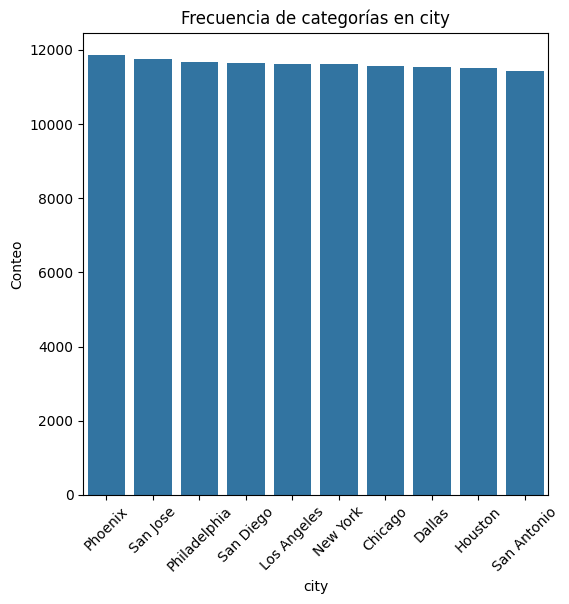

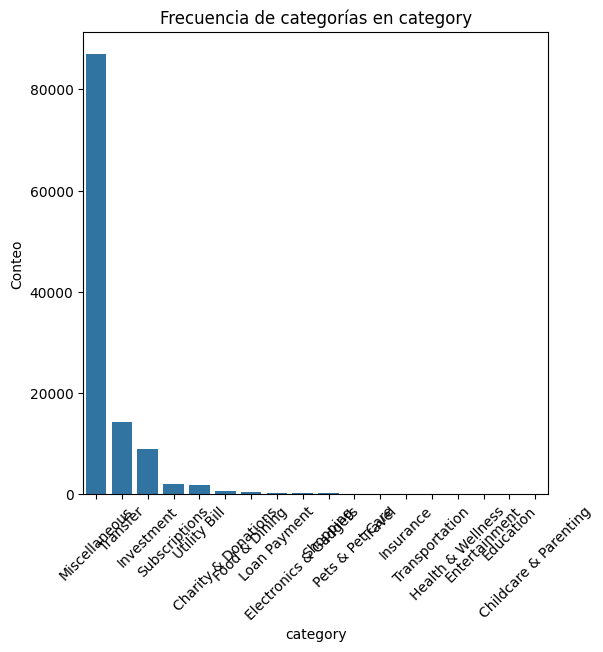

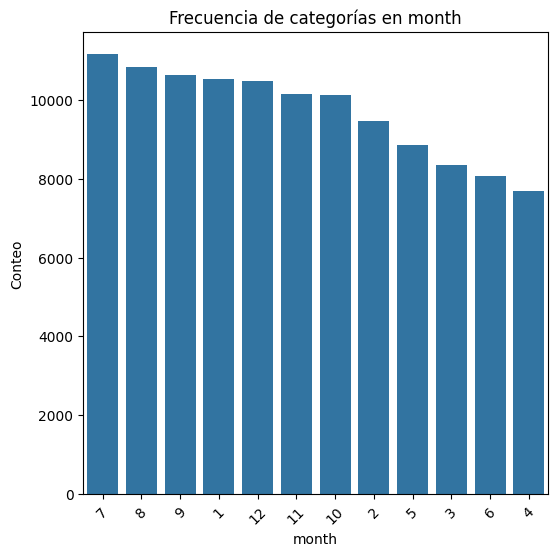

In [14]:
# Análisis Univariado - Categórico
print("Análisis Univariado de Variables Categóricas")
univariate_categorical(df, categorical_columns)

De acuerdo los gráficos de barras de las variables categóricas se evidencia:
* Aumento de transaccionalidad desde el año 2015 al año 2018, llegando a duplicarse. El año 2019 presenta una baja cantidad de transacciones debido a que la data disponible no completa el año.
* Los meses de marzo a junio presentan menor transaccionalidad que el resto del año.
* Excluyendo la categoría Miscelaneous, las categorías de transferencias, inversiones, suscripciones y rendimientos de cuenta son las más comunes en las transacciones presentadas en el set de datos.
* El gráfico de cantidad de transacciones por cuenta da idea de una posible segmentación de 3 grupos en función de su actividad:
    * Alta transaccionalidad: 2 cuentas.
    * Transaccionalidad moderada: 4 cuentas.
    * Baja transaccionalidad: 4 cuentas.
* No se observa diferencia en la cantidad de transacciones en función de las variables city y device.

#### Análisis texto - nube de palabras

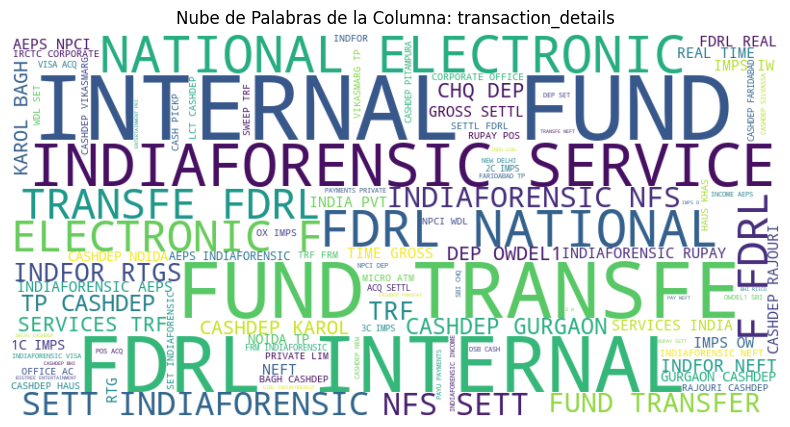

In [15]:
# Nube de palabras con la variable transaction_details
generate_wordcloud(df, 'transaction_details', max_words=100, background_color='white')

Las palabras más frecuentes en la variable 'transaction_details' hacen referencia a la transferencia interna de fondos, relacionada directamente con depósitos.

#### Análisis multivariado

Análisis Multivariado de Variables Numéricas


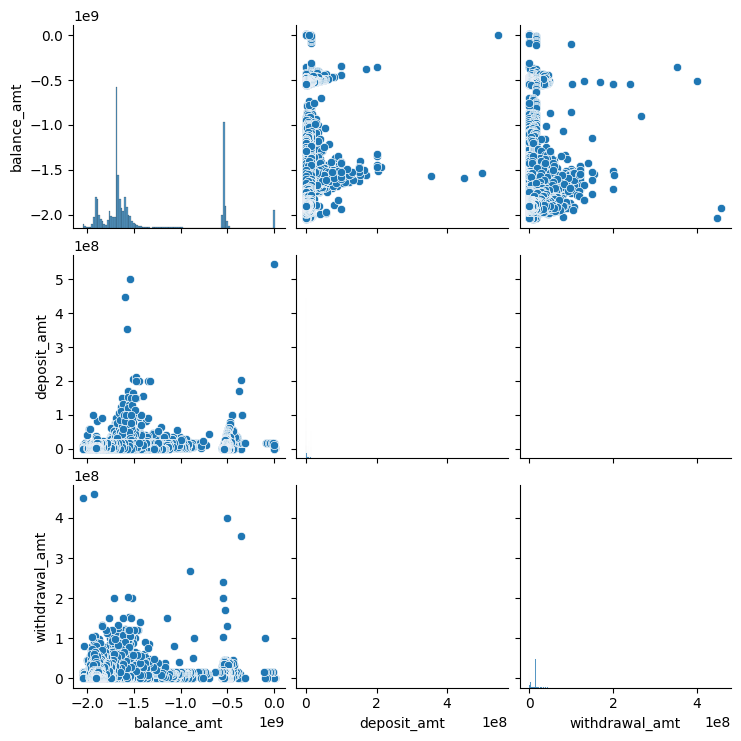

In [16]:
# Análisis Multivariado - Numérico
print("Análisis Multivariado de Variables Numéricas")
multivariate_pairplot(df, numeric_columns)

No se observa una relación lineal entre las variables de abono, depósito y balance de cuentas.

Análisis Multivariado de Variables Numéricas con Violinplots por City


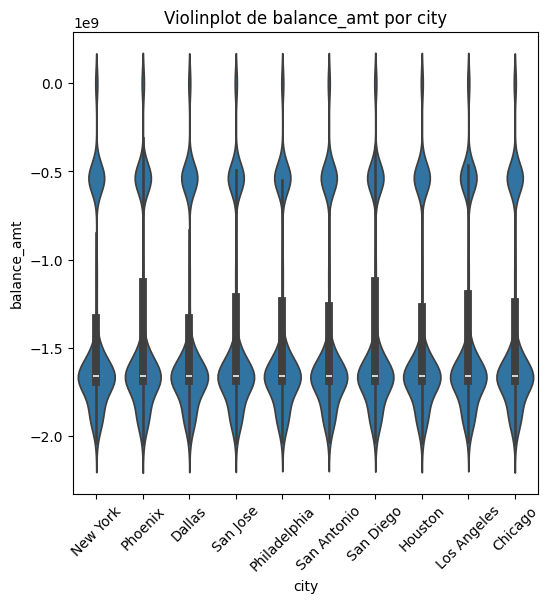

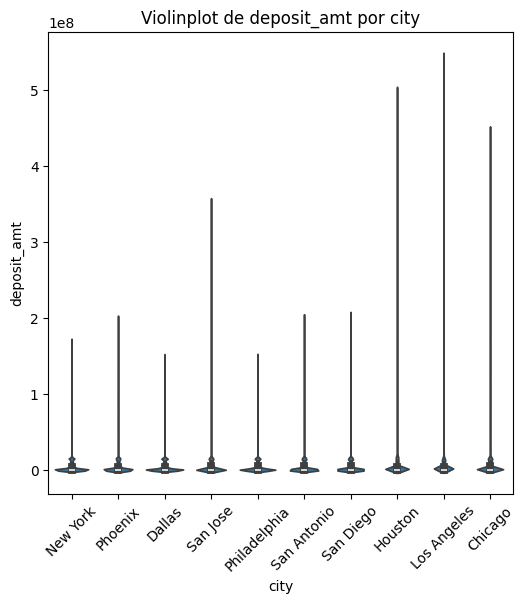

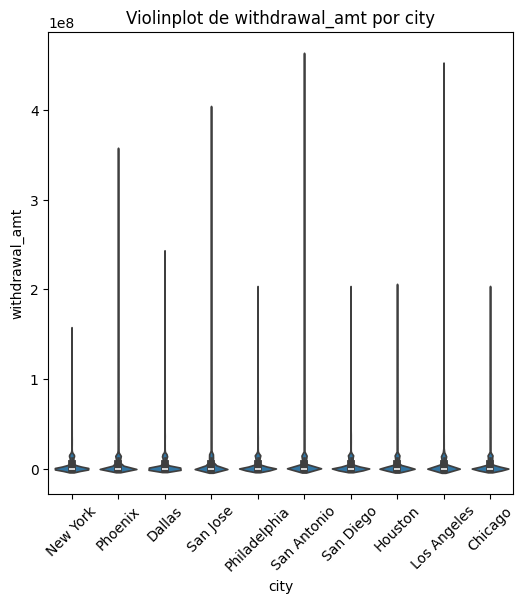

In [17]:
# Análisis Multivariado con Violinplots
print("Análisis Multivariado de Variables Numéricas con Violinplots por City")
multivariate_violinplot(df, 'city', numeric_columns)

* Se evidencia que los valores de depósito más altos y extremos se presentan en las ciudades de los Angeles, Houston, Chicago y San José.
* Por otra parte, los valores de retiro más altos y extremos se presentan en las ciudades de San Antonio, los Angeles, San José y Phoenix.

Análisis Multivariado de Variables Numéricas con Violinplots por device


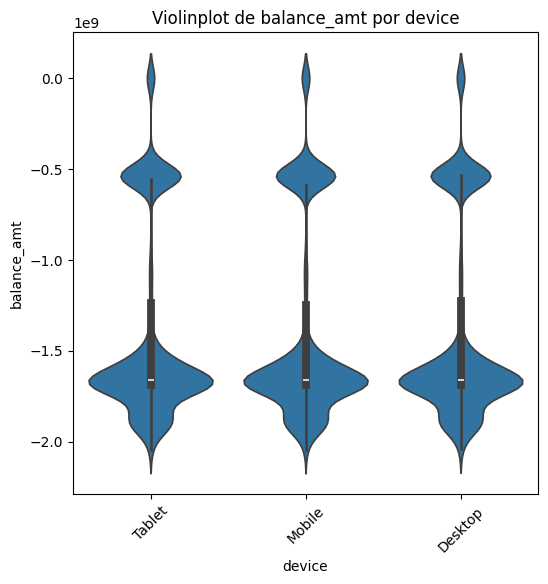

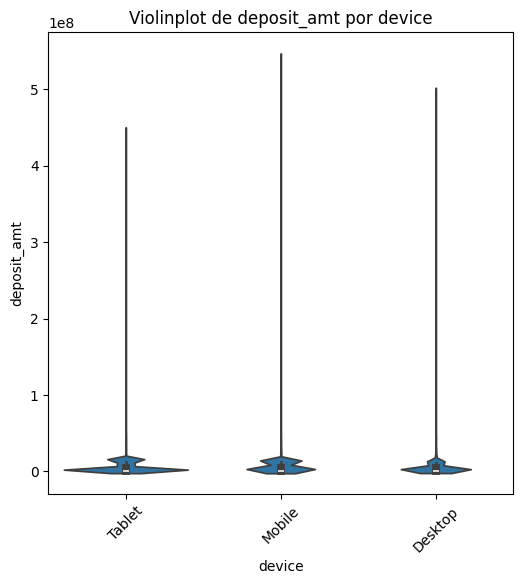

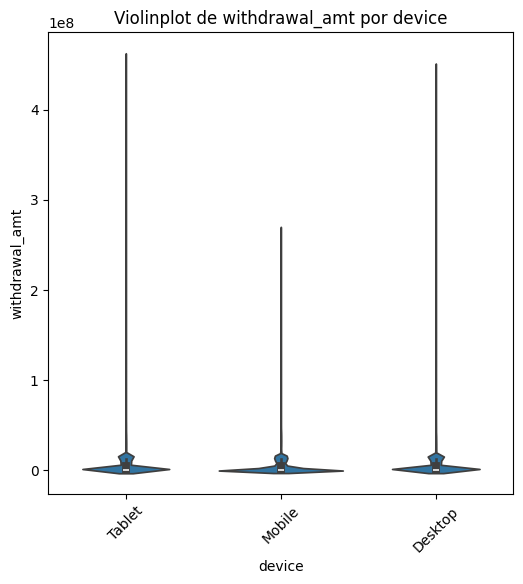

In [18]:
# Análisis Multivariado con Violinplots
print("Análisis Multivariado de Variables Numéricas con Violinplots por device")
multivariate_violinplot(df, 'device', numeric_columns)

No se observan diferencias marcadas de la distribución de las variables de abono, retiro y balance respecto al tipo de dispositivo utilizado en la transacción.

Análisis Multivariado de Variables Numéricas con Violinplots por month


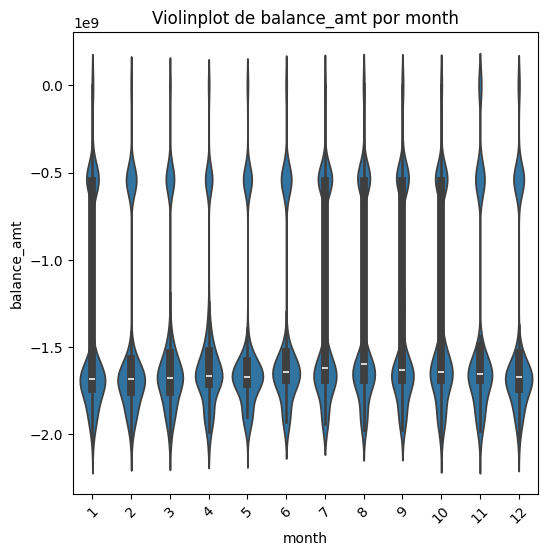

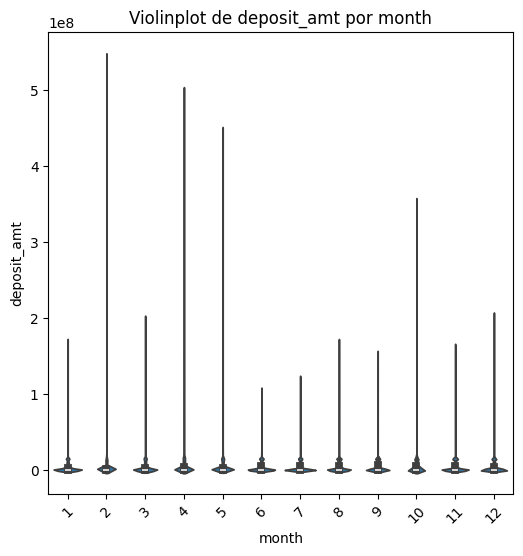

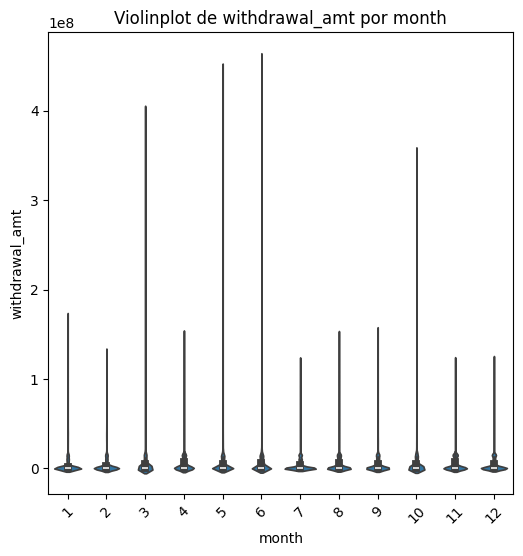

In [19]:
# Análisis Multivariado con Violinplots
print("Análisis Multivariado de Variables Numéricas con Violinplots por month")
multivariate_violinplot(df, 'month', numeric_columns)

De las relaciones entre las variables withdrawal_amt, deposit_amt y balance_amt contra la variable mes se evidencia que:
* Los depósitos más altos y extremos se presentaron durante los meses de febrero, abril, mayo y octubre.
* Los retiros más altos y extremos se presentaron durante los meses de marzo, mayo, junio y octubre.

Matriz de Correlación de Variables Numéricas


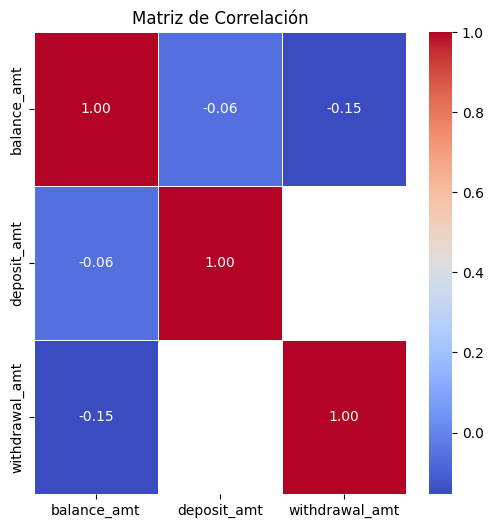

In [20]:
# Matriz de correlación
print("Matriz de Correlación de Variables Numéricas")
correlation_matrix_result = correlation_matrix(df, numeric_columns)

* Se evidencia una correlación casi nula entre los pares de variables de depósitos vs. balance y retiro vs. balance. Esto se puede deber a que ni los depósitos ni los retiros afecten el saldo de las cuentas de forma considerable (Saldos altos y movimientos relativamente bajos). 

* Vale la pena resaltar que no se puede calcular la correlación entre depósitos y retiros ya que son movimientos excluyentes en la misma transacción.

### 2. Conclusiones Análisis Exploratorio de Datos

#### 2.1. Estructura del Dataset
- Filas después de eliminar duplicados: 116,198
- Columnas: 11
- Registros duplicados eliminados: 3

#### 2.2. Análisis de Valores Nulos
- Variable `transaction_details`: 2.15% de valores faltantes, considerado manejable.
- Variable `chq_no`: 99.22% de valores faltantes, lo que indica un uso poco común de cheques para realizar depósitos.
- Variables `withdrawal_amt` y `deposit_amt`:
  - 53.92% y 46.08% de valores faltantes respectivamente, sugiriendo que cada transacción es exclusivamente un depósito o un retiro.

#### 2.3. Análisis Descriptivo de Variables Numéricas
- Período de Transacciones: Desde el 01-01-2015 hasta el 05-03-2019.
- `withdrawal_amt` (Retiros):
  - Presenta un sesgo positivo, con una media mucho mayor que la mediana.
  - Posible presencia de outliers, evidenciada por una alta desviación estándar.
- `deposit_amt` (Depósitos):
  - También presenta un sesgo positivo, con una media significativamente mayor que la mediana.
  - Posible presencia de outliers, observada a través de una alta desviación estándar.
- `balance_amt` (Saldo):
  - Predominantemente negativo, con una alta dispersión.
  - Los saldos negativos podrían indicar riesgo crediticio o comportamiento de deuda.

#### 2.4. Análisis Descriptivo de Variables Categóricas
- Historial de Cuentas: 10 cuentas diferentes, con la cuenta '1196428' representando el 42% de los registros.
- `transaction_details`: Alta variabilidad en el texto de las transacciones.
- Categorías de Transacciones:
  - 18 categorías identificadas, con `Miscellaneous` abarcando el 75% de los registros, posiblemente agrupando transacciones con información insuficiente.

#### 2.5. Análisis Univariado
- `withdrawal_amt` y `deposit_amt`:
  - Confirmada la existencia de outliers en ambas variables.
  - Se recomienda aplicar transformaciones logarítmicas para tareas de machine learning.
- `balance_amt`:
  - No se recomienda ninguna transformación o eliminación de valores extremos debido a la naturaleza inherente de la variable.
- `withdrawal_amt` y `deposit_amt` vs `balance_amt`: No se observa relación lineal entre pares de variables.

#### 2.6. Análisis Gráfico de Variables Categóricas
- Tendencias Temporales:
  - Aumento de transacciones entre 2015 y 2018, con una duplicación en volumen.
  - Menor transaccionalidad entre marzo y junio.
- Categorías Comunes:
  - Excluyendo `Miscellaneous`, las categorías más comunes son `Transferencias`, `Inversiones`, `Suscripciones` y `Rendimientos de Cuenta`.
- Segmentación de Cuentas por Transaccionalidad:
  - Alta transaccionalidad: 2 cuentas.
  - Transaccionalidad moderada: 4 cuentas.
  - Baja transaccionalidad: 4 cuentas.
- Sin diferencias notables en la cantidad de transacciones según `city` y `device`.
- Depósitos Altos y Extremos: Observados en Los Ángeles, Houston, Chicago y San José.
- Retiros Altos y Extremos: Presentes en San Antonio, Los Ángeles, San José y Phoenix.

#### 2.7. Relaciones Temporales
- Depósitos: Los más altos y extremos se registraron en febrero, abril, mayo y octubre.
- Retiros: Los más altos y extremos ocurrieron en marzo, mayo, junio y octubre.

#### 2.8. Recomendaciones
- Aplicación de Transformaciones Logarítmicas: Sobre `withdrawal_amt` y `deposit_amt` para reducir la asimetría.

### 3. Posibles casos de uso del dataset

#### 3.1. Detección de Fraude
* Objetivo y Tipo de Modelo. Identificar transacciones fraudulentas mediante modelos de clasificación binaria o detección de anomalías.
* Datos Adicionales. Historial de ubicación geográfica, patrones de tiempo, información de dispositivos.
#### 3.2. Análisis de Comportamiento del Cliente
* Objetivo y Tipo de Modelo. Segmentar a los clientes según su comportamiento financiero utilizando modelos de clustering.
* Datos Adicionales. Datos demográficos, interacciones con la plataforma y preferencias de estilo de vida.
#### 3.3. Predicción de Saldo o Cash Flow
* Objetivo y Tipo de Modelo. Predecir el saldo futuro o flujo de caja con modelos de series temporales o regresión.
* Datos Adicionales. Información de ingresos y gastos fijos.
#### 3.4. Recomendación de Productos Financieros
* Objetivo y Tipo de Modelo. Ofrecer recomendaciones personalizadas de productos financieros con sistemas de recomendación.
* Datos Adicionales. Preferencias del cliente, historial de productos financieros y encuestas de satisfacción.
#### 3.5. Estimación de Riesgo Crediticio
* Objetivo y Tipo de Modelo. Evaluar el riesgo crediticio de los clientes mediante modelos de clasificación o scoring de crédito.
* Datos Adicionales. Historial crediticio externo, obligaciones actuales y eventos de mora.
#### 3.7. Pronóstico de Deserción de Clientes
* Objetivo y Tipo de Modelo. Identificar clientes en riesgo de deserción utilizando modelos de clasificación binaria.
* Datos Adicionales. Historial de interacción con servicio al cliente, indicadores de desinterés.